In [89]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [90]:
from mnist import MNIST
mndata = MNIST('./data')
images, labels = mndata.load_training()
images = np.array(images)
images = images.astype("float32") / 255
labels = np.eye(10)[labels]

[n,m] = images.shape

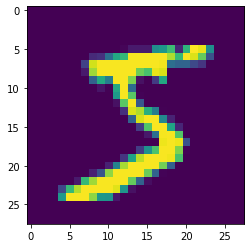

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [91]:
plt.imshow(images[0].reshape(28,28))
plt.show()
print(labels[0])

In [95]:
itter = 5
hidden_layers = np.arange(1,200,5)
times = len(hidden_layers)
data = np.zeros((times,itter+2))
for layers, j in zip(hidden_layers,range(times)):
    # weights of hiden layer
    w_h = np.random.uniform(-0.5, 0.5, (layers, 784))
    # weights of output layer
    w_o =  np.random.uniform(-0.5, 0.5, (10, layers))
    # bias of hiden layer
    b_h = np.zeros((layers, 1))
    # bias of output layer
    b_o = np.zeros((10, 1))

    learn_rate = 0.01
    nr_correct = 0
    
    for i in range(itter):
        for N in range(6000):
            start_time = time.time()
            
            img = np.array(images[N],ndmin=2)
            l = np.array(labels[N],ndmin=2)
            l = np.transpose(l)
            print(j,'/',times,end='\r')
            # Hidden
            y_tmp = w_h @ np.transpose(img)+ b_h
            y = 1 / (1 + np.exp(-y_tmp))

            # Output
            o_tmp = w_o @ y + b_o
            o = 1 / (1 + np.exp(-o_tmp))

            #Error
            e = 1/len(o)*np.sum((o-l)**2)
            nr_correct += int(np.argmax(o)==np.argmax(l))

            # Backpropagation
            delta_o = o-l
            w_o += -learn_rate * delta_o @ np.transpose(y)
            b_o += -learn_rate * delta_o

            delta_h = np.transpose(w_o)@delta_o*y*(1-y)
            w_h += -learn_rate * delta_h @ img
            b_h += -learn_rate * delta_h

        # Show accuracy for this epoch
        acc = round((nr_correct / images.shape[0]) * 100, 2)
        #print(f"Acc: {acc}%")
        program_starts = time.time()
        end_time = time.time()
        data[j,0] = layers
        data[j,1] = end_time - start_time
        data[j,i+2] = acc
        nr_correct = 0
print(data)

[[1.00000000e+00 6.22272491e-05 1.04000000e+00 1.07000000e+00
  1.07000000e+00 1.12000000e+00 1.56000000e+00]
 [6.00000000e+00 7.39097595e-05 3.04000000e+00 5.04000000e+00
  6.42000000e+00 7.14000000e+00 7.70000000e+00]
 [1.10000000e+01 1.22308731e-04 5.14000000e+00 7.54000000e+00
  8.32000000e+00 8.67000000e+00 8.83000000e+00]
 [1.60000000e+01 2.69651413e-04 5.92000000e+00 8.38000000e+00
  8.77000000e+00 8.95000000e+00 9.05000000e+00]
 [2.10000000e+01 2.95639038e-04 6.17000000e+00 8.42000000e+00
  8.83000000e+00 8.99000000e+00 9.11000000e+00]
 [2.60000000e+01 3.16381454e-04 6.47000000e+00 8.60000000e+00
  8.95000000e+00 9.10000000e+00 9.21000000e+00]
 [3.10000000e+01 3.34978104e-04 6.88000000e+00 8.65000000e+00
  8.96000000e+00 9.09000000e+00 9.21000000e+00]
 [3.60000000e+01 3.53336334e-04 6.73000000e+00 8.59000000e+00
  8.96000000e+00 9.15000000e+00 9.24000000e+00]
 [4.10000000e+01 5.36441803e-04 6.83000000e+00 8.71000000e+00
  9.01000000e+00 9.17000000e+00 9.27000000e+00]
 [4.600000

/tmp/ipykernel_9732/781853373.py:38: RuntimeWarning: overflow encountered in exp
  h = 1 / (1 + np.exp(-h_pre))


Acc: 9.2%
Acc: 9.21%
Acc: 9.21%
Acc: 9.21%
Enter a number (0 - 59999):  0


/tmp/ipykernel_9732/781853373.py:69: RuntimeWarning: overflow encountered in exp
  h = 1 / (1 + np.exp(-h_pre))


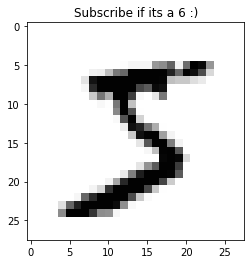

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


"""
w = weights, b = bias, i = input, h = hidden, o = output, l = label
e.g. w_i_h = weights from input layer to hidden layer
"""

from mnist import MNIST
mndata = MNIST('./data')
images, labels = mndata.load_training()
images = np.array(images)
labels = np.array(labels)

# weights of i-h layer
#w_i_h = np.random.uniform(-0.5, 0.5, (20, 784))
w_i_h = np.zeros([20, 784])
# weights of h-o layer
w_h_o = np.random.uniform(-0.5, 0.5, (10, 20))
# bias of h-o layer
b_i_h = np.zeros((20, 1))
# bias of h-o layer
b_h_o = np.zeros((10, 1))

learn_rate = 0.01
nr_correct = 0

epochs = 4
for epoch in range(epochs):
    for img, leb in zip(images, labels):
        img.shape += (1,)
        l = np.zeros((10,1))
        l[leb]=1

        # Forward propagation input -> hidden
        h_pre = b_i_h + w_i_h @ img
        h = 1 / (1 + np.exp(-h_pre))
        # Forward propagation hidden -> output
        o_pre = b_h_o + w_h_o @ h
        o = 1 / (1 + np.exp(-o_pre))

        # Cost / Error calculation
        e = 1 / len(o) * np.sum((o - l) ** 2, axis=0)
        nr_correct += int(np.argmax(o) == np.argmax(l))

        # Backpropagation output -> hidden (cost function derivative)
        delta_o = o - l
        w_h_o += -learn_rate * delta_o @ np.transpose(h)
        b_h_o += -learn_rate * delta_o
        # Backpropagation hidden -> input (activation function derivative)
        delta_h = np.transpose(w_h_o) @ delta_o * (h * (1 - h))
        w_i_h += -learn_rate * delta_h @ np.transpose(img)
        b_i_h += -learn_rate * delta_h

    # Show accuracy for this epoch
    print(f"Acc: {round((nr_correct / images.shape[0]) * 100, 2)}%")
    nr_correct = 0

# Show results
while True:
    index = int(input("Enter a number (0 - 59999): "))
    img = images[index]
    plt.imshow(img.reshape(28, 28), cmap="Greys")

    img.shape += (1,)
    # Forward propagation input -> hidden
    h_pre = b_i_h + w_i_h @ img.reshape(784, 1)
    h = 1 / (1 + np.exp(-h_pre))
    # Forward propagation hidden -> output
    o_pre = b_h_o + w_h_o @ h
    o = 1 / (1 + np.exp(-o_pre))

    plt.title(f"Subscribe if its a {o.argmax()} :)")
    plt.show()


In [ ]:
"""
img = np.array([0,0.2,0.62,1,0.62],ndmin=2)
wh  = np.array([[0.05,0.22,0.1,0.04,-0.08],
        [0.15,-0.06,0.39,0.46,-0.12],
        [0.29,0.03,0.07,0.43,-0.43],
        [0.41,0.48,0.33,8.66,0.37]])

bh  = np.zeros((4,1))
wo  = np.array([[0.48,0.3,-0.04,0.28],
        [-0.38,0.14,-0.36,0.44],
        [0.02,-0.09,-0.24,0.27]])
bo = np.zeros((3,1))
"""